In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")
plt.style.use("default")
sns.set_style('ticks')

In [2]:
madrid_bnb = pd.read_csv("listings.csv",
                          true_values=['t'], false_values=['f'], na_values=[None, 'none'])

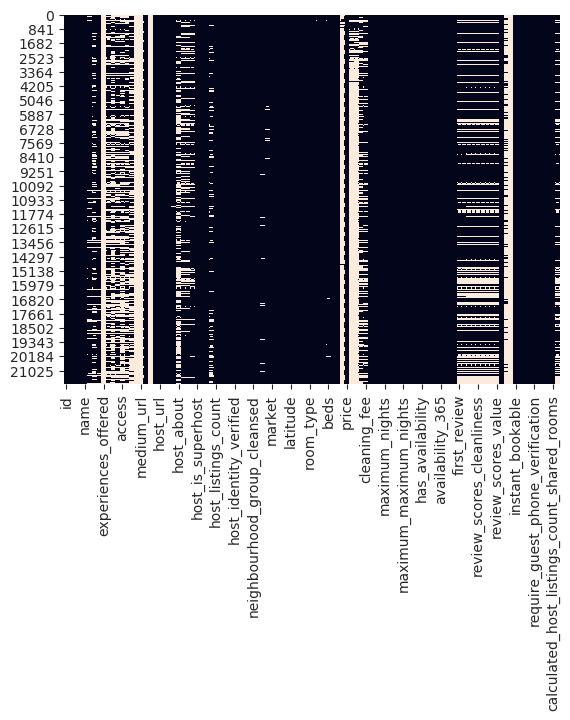

In [3]:
sns.heatmap(madrid_bnb.isnull(), cbar=False)

In [4]:
madrid_bnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20200218053546,2020-02-18,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,NaN,Nice and definitely non touristic neighborhoo...,...,False,False,flexible,False,False,1,0,1,0,0.61
1,21853,https://www.airbnb.com/rooms/21853,20200218053546,2020-02-18,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,NaN,We live in a leafy neighbourhood with plenty o...,...,False,False,strict_14_with_grace_period,False,False,2,0,2,0,0.51
2,23001,https://www.airbnb.com/rooms/23001,20200218053546,2020-02-18,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Apartamento de lujo, tres dormitorios dobles i...","Apartamento de tres dormitorios dobles, gran s...",NaN,"Barrio Arganzuela, junto a Madrid Rio, zonas c...",...,False,False,moderate,False,False,5,5,0,0,NaN


In [5]:
madrid_bnb[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,17104.000000,17101.000000,17104.000000,17103.000000,17103.000000,17100.000000,17099.000000
mean,92.264675,9.510380,9.365119,9.615448,9.638601,9.658480,9.164279
std,9.256563,0.905713,0.982774,0.842871,0.830973,0.720787,0.995297
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,90.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
madrid_bnb.shape

(21845, 106)

In [7]:
indices = np.array([madrid_bnb.columns])
print(indices)

[['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
  'description' 'experiences_offered' 'neighborhood_overview' 'notes'
  'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
  'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
  'host_name' 'host_since' 'host_location' 'host_about'
  'host_response_time' 'host_response_rate' 'host_acceptance_rate'
  'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
  'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
  'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
  'street' 'neighbourhood' 'neighbourhood_cleansed'
  'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
  'smart_location' 'country_code' 'country' 'latitude' 'longitude'
  'is_location_exact' 'property_type' 'room_type' 'accommodates'
  'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet'
  'price' 'weekly_price' 'monthly_price' 'security_deposit'
  'cleaning_fee'

In [8]:
madrid_bnb["host_response_time"]

0        within a few hours
1                       NaN
2            within an hour
3        within a few hours
4            within an hour
                ...        
21840        within an hour
21841                   NaN
21842        within an hour
21843        within an hour
21844        within an hour
Name: host_response_time, Length: 21845, dtype: object

## Limpieza

In [9]:
## Barrios
print("Hay estos valores NaN en nighbourhood: ", madrid_bnb["neighbourhood_group_cleansed"].isnull().sum())


Hay estos valores NaN en nighbourhood:  0


In [10]:
#price
    # Lo cambio a numerico
madrid_bnb["price"] = madrid_bnb["price"].map(lambda x: x.lstrip('$'))
madrid_bnb["price"] = pd.to_numeric(madrid_bnb["price"], errors = "coerce")
print("Hay estos valores NaN en price: ", madrid_bnb["price"].isnull().sum())
madrid_bnb["price"] = madrid_bnb["price"].fillna(madrid_bnb["price"].mean())
madrid_bnb["price"] = madrid_bnb["price"].replace(0, madrid_bnb["price"].mean())

#beds
madrid_bnb.loc[madrid_bnb["beds"] > 15, "beds"] = madrid_bnb["beds"].mean()
print("Hay estos valores NaN en beds: ", madrid_bnb["beds"].isnull().sum())
madrid_bnb["beds"] = madrid_bnb["beds"].fillna(madrid_bnb["beds"].mean())


Hay estos valores NaN en price:  542
Hay estos valores NaN en beds:  217


## Análisis Exploratorio de los Datos

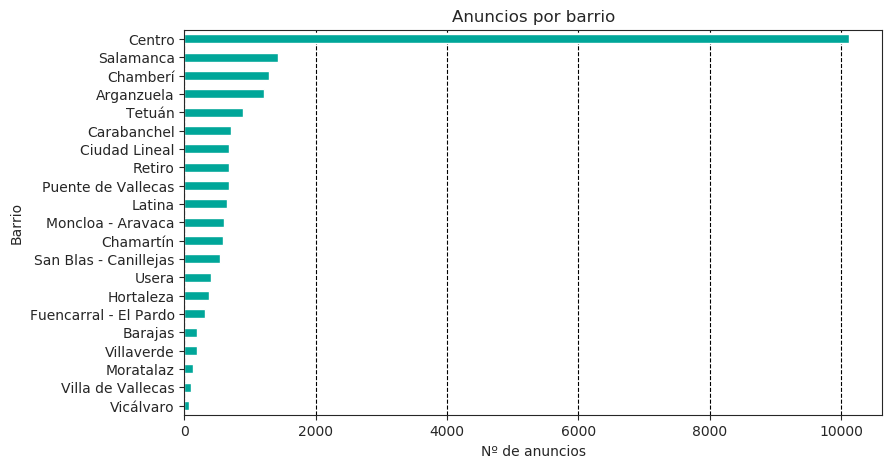

In [11]:
fig, ax = plt.subplots(figsize=(9, 5))

barplot_data = madrid_bnb.groupby("neighbourhood_group_cleansed").size().sort_values()

barplot_data.plot.barh(ax = ax, color = ['#00A699'])

ax.grid(axis='x', c='k', ls='--')

ax.set_ylabel('Barrio')
ax.set_xlabel('Nº de anuncios')


ax.set_title('Anuncios por barrio')

plt.show()

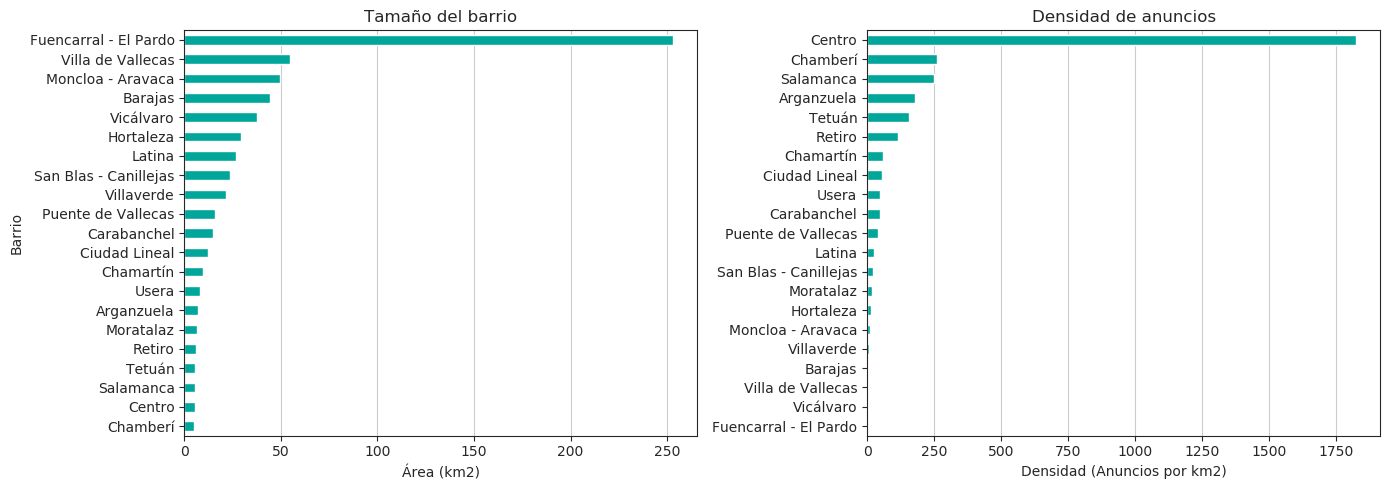

In [12]:
n_listings_per_district = (madrid_bnb['neighbourhood_group_cleansed'].value_counts())

import json
from shapely.geometry import MultiPolygon
with open('neighbourhoods.geojson') as f:
    geojson = json.loads(f.read())
areas = [{'area': MultiPolygon(feature['geometry']['coordinates'], context_type='geojson').area, 
          **feature['properties']} for feature in geojson['features']]
areas_srs = (
    pd.DataFrame(areas)
    .groupby('neighbourhood_group')
    ['area']
    .sum() * 10**4)

fig, ((ax1, ax2)) = plt.subplots(1, 2
                                 , figsize=(14, 5))


areas_srs.sort_values().plot(kind='barh', ax=ax1,  color = ['#00A699'])


ax1.set_title('Tamaño del barrio')
ax1.grid(axis='x')
ax1.set_ylabel('Barrio')
ax1.set_xlabel('Área (km2)')

n_listings_per_district.divide(areas_srs).sort_values().plot(kind='barh', ax=ax2, color = ['#00A699'])

ax2.set_title('Densidad de anuncios')
ax2.set_xlabel('Densidad (Anuncios por km2)')
ax2.grid(axis='x')

fig.tight_layout()
plt.show()

In [13]:
madrid_bnb2 = madrid_bnb[madrid_bnb.price<300]

<function matplotlib.pyplot.show(*args, **kw)>

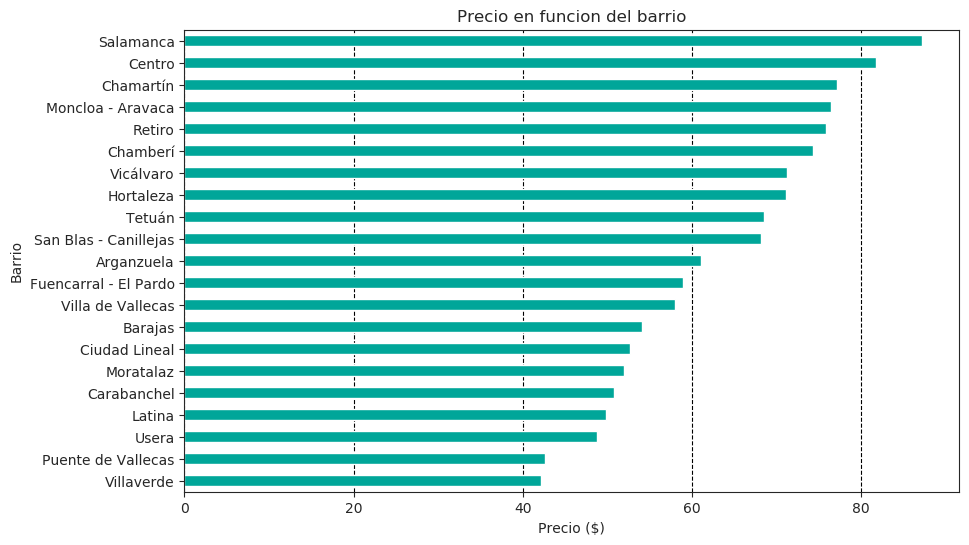

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
data = madrid_bnb2.groupby("neighbourhood_group_cleansed").mean()["price"].sort_values()

data.plot(kind = "barh", ax=ax, color = ['#00A699'])

ax.set_ylabel("Barrio")
ax.set_xlabel("Precio ($)")
ax.set_title("Precio en funcion del barrio")
ax.grid(axis='x', c='k', ls='--')

plt.show

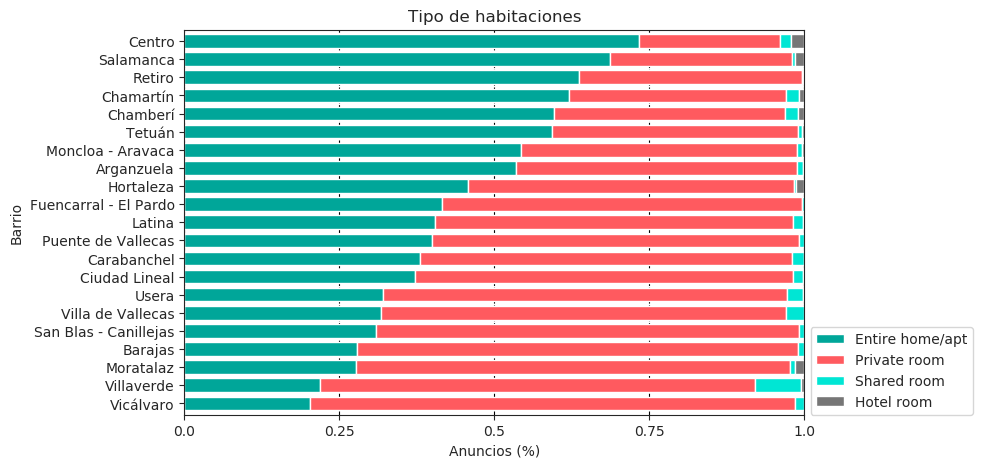

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))

barplot_data = (
    madrid_bnb
    .groupby(['neighbourhood_group_cleansed', 'room_type'])
    .size()
    .unstack('room_type')
    .fillna(0)
    .apply(lambda row: row / row.sum(), axis=1)
    .sort_values('Entire home/apt')
    .reindex(columns=madrid_bnb['room_type'].value_counts().index))

barplot_data.plot(kind='barh', width=0.75, stacked=True, ax=ax, color = ['#00A699', '#FF5A5F', "#00e6d4", "#767676"])

ax.set_xticks(np.linspace(0,1, 5))
ax.set_xlim(0,1)
ax.grid(axis='x', c='k', ls='--')
ax.set_xticklabels(np.linspace(0,1, 5))
ax.set_ylabel('Barrio')
ax.set_xlabel('Anuncios (%)')
ax.legend(loc=(1.01, 0))

ax.set_title('Tipo de habitaciones')

plt.show()




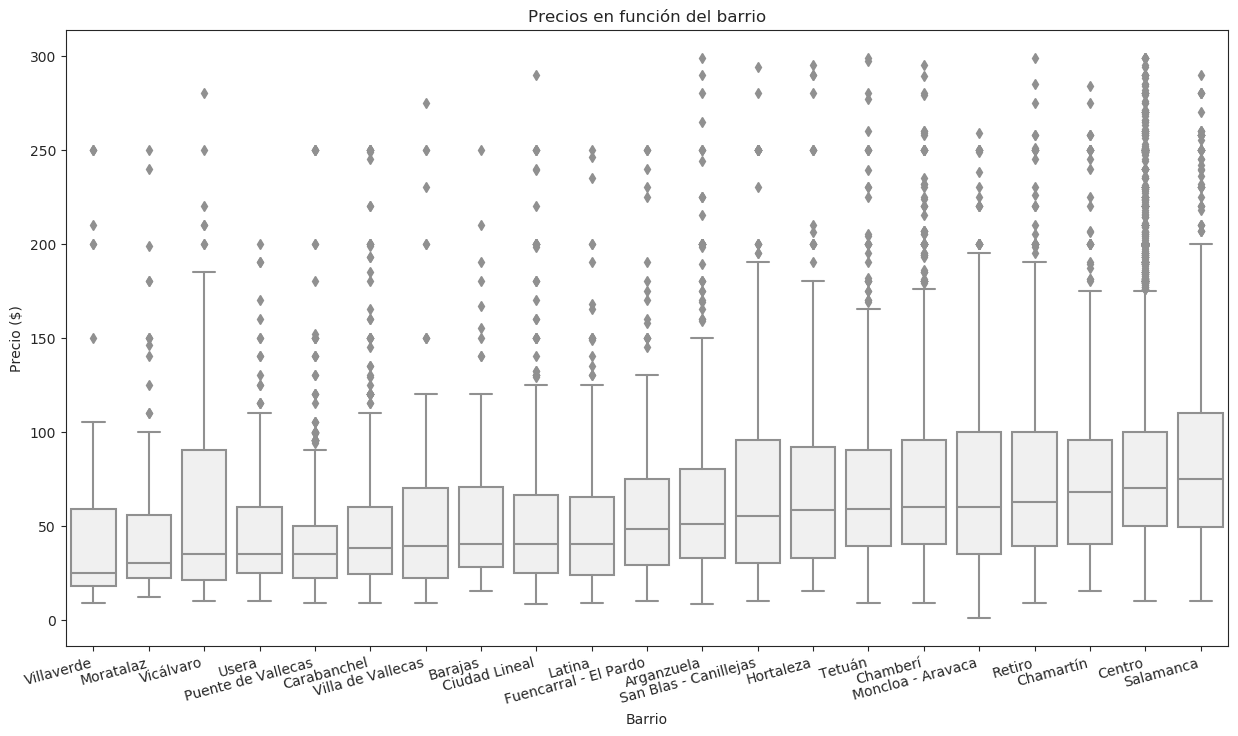

In [16]:
order = list(madrid_bnb2.groupby("neighbourhood_group_cleansed").agg("median")["price"].sort_values().index)
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(data=madrid_bnb2, x='neighbourhood_group_cleansed', y='price', order = order, palette = ["#f0f0f0"])
plt.xticks(rotation=15, ha = "right")
#xmin, xmax = plt.xlim()
#plt.hlines(madrid_bnb2.price.mean(), xmin, xmax)

plt.ylabel("Precio ($)")
plt.xlabel("Barrio")
plt.title("Precios en función del barrio")
plt.show()

fig.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/preciosbarrio.png")

## Mejores huéspedes

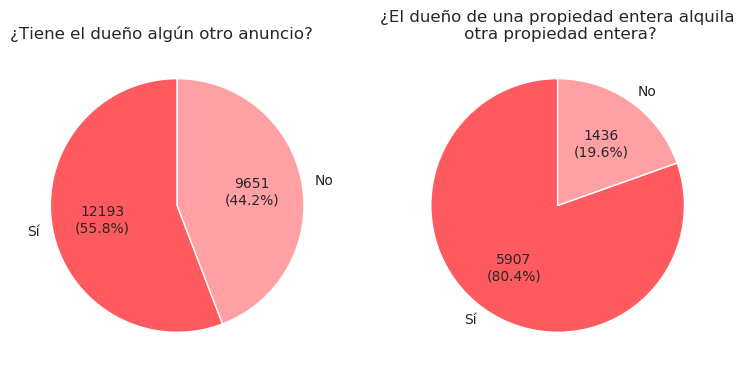

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,10))

pie_data = (
    madrid_bnb['host_id']
    .map(madrid_bnb.groupby('host_id').size() > 1).value_counts())

pie_data.plot(
    kind='pie', labels=['Sí', 'No'], colors=['#FF5A5F', "#ffa1a4"], 
    autopct=lambda v: (
                  '{}'.format(int(v/100*sum(pie_data))) +
                  '\n' + '({:.1%})'.format(v/100)),
    startangle=90, ax=ax1)

ax1.set_ylabel('')
ax1.set_title('¿Tiene el dueño algún otro anuncio?      ')




pie_data = (
    madrid_bnb[
        madrid_bnb['room_type'].isin(['Entire home/apt', 'Hotel room'])]
    .groupby('host_id')
    .size()
    .gt(1)
    .value_counts())

pie_data.plot(
    kind='pie', labels=['Sí', 'No'], colors=['#FF5A5F', "#ffa1a4"], 
    autopct=lambda v: (
                  '{}'.format(int(v/100*sum(pie_data))) +
                  '\n' + '({:.1%})'.format(v/100)),
    startangle=90, ax=ax2)

ax2.set_ylabel('')
ax2.set_title('¿El dueño de una propiedad entera alquila\n otra propiedad entera?')

plt.show()

Hay 65 huéspedes que tienen más de 20 anuncios


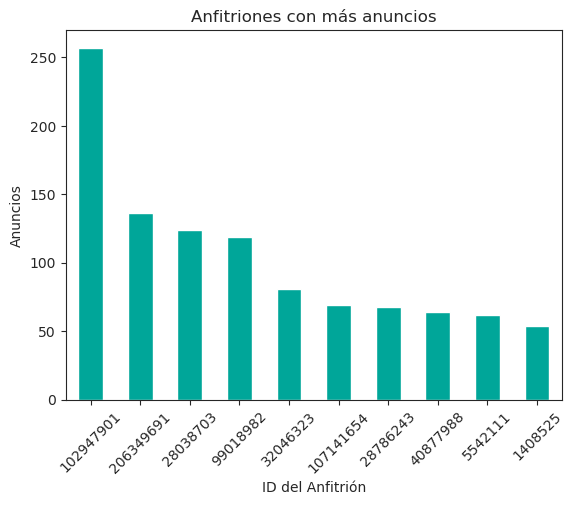

In [18]:
top_host=madrid_bnb.host_id.value_counts().head(10)


top_host.plot(kind='bar', color = "#00A699")
plt.xticks(rotation=45)
plt.ylabel("Anuncios")
plt.xlabel("ID del Anfitrión")
print("Hay {} huéspedes que tienen más de 20 anuncios".format(sum(madrid_bnb.host_id.value_counts() > 20)))
plt.title("Anfitriones con más anuncios")
plt.show()




Vamos a estudiar un poco más detenidamente a los 4 primeros, para ver que clase de negocio tienen montado en torno a AirBnB

In [19]:
host_top1 = madrid_bnb[madrid_bnb["host_id"]==102947901]
host_top2 = madrid_bnb[madrid_bnb["host_id"]==206349691]
host_top3 = madrid_bnb[madrid_bnb["host_id"]==28038703]
host_top4 = madrid_bnb[madrid_bnb["host_id"]==99018982]
host_top10 = madrid_bnb[madrid_bnb["host_id"]==159558182]

In [20]:
print(host_top1["host_since"].unique())
print(host_top2["host_since"].unique())
print(host_top3["host_since"].unique())
print(host_top4["host_since"].unique())

['2016-11-08']
['2018-07-31']
['2015-02-20']
['2016-10-10']


In [21]:
barrio1 = pd.DataFrame(host_top1["neighbourhood_group_cleansed"].value_counts()).rename(columns = {"neighbourhood_group_cleansed" : "host1"})
barrio2 = pd.DataFrame(host_top2["neighbourhood_group_cleansed"].value_counts()).rename(columns = {"neighbourhood_group_cleansed" : "host2"})
barrio3 = pd.DataFrame(host_top3["neighbourhood_group_cleansed"].value_counts()).rename(columns = {"neighbourhood_group_cleansed" : "host3"})
barrio4 = pd.DataFrame(host_top4["neighbourhood_group_cleansed"].value_counts()).rename(columns = {"neighbourhood_group_cleansed" : "host4"})
barrio1_2 = barrio1.merge(barrio2, how = "outer", left_index=True, right_index=True)
barrio3_4 = barrio3.merge(barrio4, how = "outer", left_index=True, right_index=True)
barrio = barrio1_2.merge(barrio3_4, how = "outer", left_index=True, right_index=True)
for i in range(barrio.shape[1]):
    barrio.iloc[:,i] = barrio.iloc[:,i]/barrio.iloc[:,i].sum()

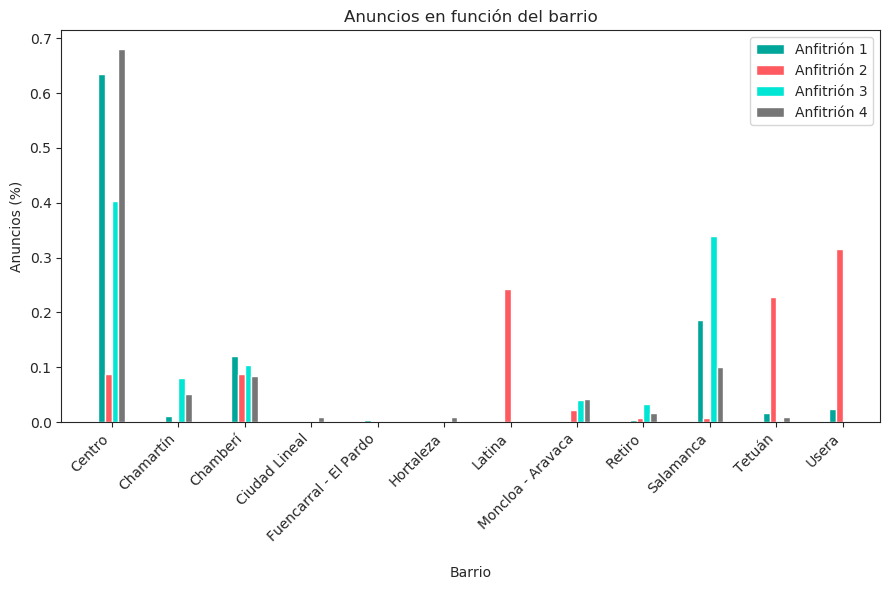

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = barrio.index


x = np.arange(len(labels))  
width = 0.1  
color = ['#00A699', '#FF5A5F', "#00e6d4", "#767676"]
fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - width*3/2, barrio["host1"], width, label='Anfitrión 1', color = color[0])
rects2 = ax.bar(x -width/2, barrio["host2"], width, label='Anfitrión 2', color = color[1])
rects3 = ax.bar(x + width/2, barrio["host3"], width, label='Anfitrión 3', color = color[2])
rects4 = ax.bar(x + width*3/2, barrio["host4"], width, label='Anfitrión 4', color = color[3])


ax.set_ylabel('Anuncios (%)')
ax.set_xlabel("\nBarrio")
ax.set_title('Anuncios en función del barrio')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45,ha="right")
ax.legend(loc = 1)


fig.tight_layout()
plt.show()

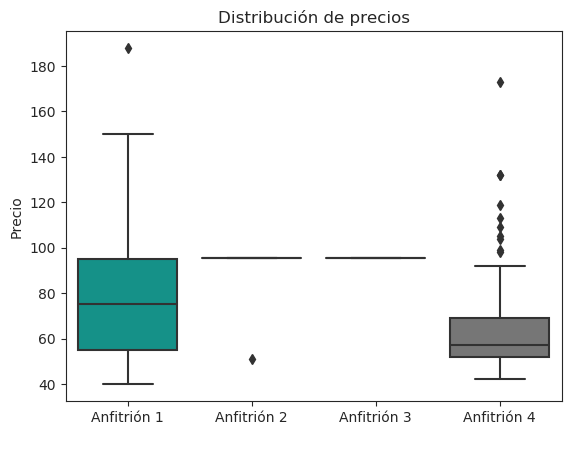

In [23]:
top_hosts = madrid_bnb2.loc[(madrid_bnb2["host_id"] == 102947901) | (madrid_bnb2["host_id"] == 206349691) |
                              (madrid_bnb2["host_id"] == 28038703) | (madrid_bnb2["host_id"] == 99018982)]
sns.boxplot(data=top_hosts, x='host_id', y='price', palette = ['#00A699', '#FF5A5F', "#00e6d4", "#767676"], order = [102947901, 206349691,28038703, 99018982])
plt.xticks([0,1,2,3], labels = ["Anfitrión 1", "Anfitrión 2", "Anfitrión 3", "Anfitrión 4"])
plt.xlabel(" ")
plt.ylabel("Precio")
plt.title("Distribución de precios")
plt.show()

#### Tipo de habitación

In [24]:
habita1 = pd.DataFrame(host_top1["room_type"].value_counts()).rename(columns = {"room_type" : "Anfitrión 1"})
habita2 = pd.DataFrame(host_top2["room_type"].value_counts()).rename(columns = {"room_type" : "Anfitrión 2"})
habita3 = pd.DataFrame(host_top3["room_type"].value_counts()).rename(columns = {"room_type" : "Anfitrión 3"})
habita4 = pd.DataFrame(host_top4["room_type"].value_counts()).rename(columns = {"room_type" : "Anfitrión 4"})
habita1_2 = habita1.merge(habita2, how = "outer", left_index=True, right_index=True)
habita3_4 = habita3.merge(habita4, how = "outer", left_index=True, right_index=True)
habita = habita1_2.merge(habita3_4, how = "outer", left_index=True, right_index=True)
for i in range(habita.shape[1]):
    habita.iloc[:,i] = habita.iloc[:,i]/habita.iloc[:,i].sum()

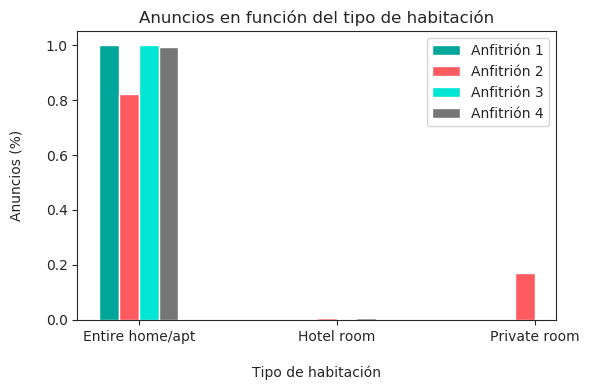

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = habita.index


x = np.arange(len(labels)) 
width = 0.1 
color = ['#00A699', '#FF5A5F', "#00e6d4", "#767676"]
fig, ax = plt.subplots(figsize = (6,4))
rects1 = ax.bar(x - width*3/2, habita["Anfitrión 1"], width, label='Anfitrión 1', color = color[0])
rects2 = ax.bar(x -width/2, habita["Anfitrión 2"], width, label='Anfitrión 2', color = color[1])
rects3 = ax.bar(x + width/2, habita["Anfitrión 3"], width, label='Anfitrión 3', color = color[2])
rects4 = ax.bar(x + width*3/2, habita["Anfitrión 4"], width, label='Anfitrión 4', color = color[3])


ax.set_ylabel('Anuncios (%)\n')
ax.set_xlabel("\nTipo de habitación")
ax.set_title('Anuncios en función del tipo de habitación')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 1)


fig.tight_layout()
plt.show()

#### Cantidad de habitaciones

In [26]:
host_top1["groups_accommodates"] = pd.Series()
host_top1.loc[host_top1["accommodates"] == 1, "groups_accommodates"] = "Individual (1 persona)"
host_top1.loc[host_top1["accommodates"] == 2, "groups_accommodates"] = "Pareja (2 personas)"
host_top1.loc[((host_top1["accommodates"] == 3) | (host_top1["accommodates"] == 4) | (host_top1["accommodates"] == 5) | (host_top1["accommodates"] == 6)), "groups_accommodates"] = "Familia (3-6 personas)"
host_top1.loc[((host_top1["accommodates"] >6) & (host_top1["accommodates"] < 11)), "groups_accommodates"] = "Grupo (7-10 personas)"
host_top1.loc[host_top1["accommodates"] >= 11, "groups_accommodates"] = "Gran Grupo (11 o más)"

host_top2["groups_accommodates"] = pd.Series()
host_top2.loc[host_top2["accommodates"] == 1, "groups_accommodates"] = "Individual (1 persona)"
host_top2.loc[host_top2["accommodates"] == 2, "groups_accommodates"] = "Pareja (2 personas)"
host_top2.loc[((host_top2["accommodates"] == 3) | (host_top2["accommodates"] == 4) | (host_top2["accommodates"] == 5) | (host_top2["accommodates"] == 6)), "groups_accommodates"] = "Familia (3-6 personas)"
host_top2.loc[((host_top2["accommodates"] >6) & (host_top2["accommodates"] < 11)), "groups_accommodates"] = "Grupo (7-10 personas)"
host_top2.loc[host_top2["accommodates"] >= 11, "groups_accommodates"] = "Gran Grupo (11 o más)"

host_top3["groups_accommodates"] = pd.Series()
host_top3.loc[host_top3["accommodates"] == 1, "groups_accommodates"] = "Individual (1 persona)"
host_top3.loc[host_top3["accommodates"] == 2, "groups_accommodates"] = "Pareja (2 personas)"
host_top3.loc[((host_top3["accommodates"] == 3) | (host_top3["accommodates"] == 4) | (host_top3["accommodates"] == 5) | (host_top3["accommodates"] == 6)), "groups_accommodates"] = "Familia (3-6 personas)"
host_top3.loc[((host_top3["accommodates"] >6) & (host_top3["accommodates"] < 11)), "groups_accommodates"] = "Grupo (7-10 personas)"
host_top3.loc[host_top3["accommodates"] >= 11, "groups_accommodates"] = "Gran Grupo (11 o más)"

host_top4["groups_accommodates"] = pd.Series()
host_top4.loc[host_top4["accommodates"] == 1, "groups_accommodates"] = "Individual (1 persona)"
host_top4.loc[host_top4["accommodates"] == 2, "groups_accommodates"] = "Pareja (2 personas)"
host_top4.loc[((host_top4["accommodates"] == 3) | (host_top4["accommodates"] == 4) | (host_top4["accommodates"] == 5) | (host_top4["accommodates"] == 6)), "groups_accommodates"] = "Familia (3-6 personas)"
host_top4.loc[((host_top4["accommodates"] >6) & (host_top4["accommodates"] < 11)), "groups_accommodates"] = "Grupo (7-10 personas)"
host_top4.loc[host_top4["accommodates"] >= 11, "groups_accommodates"] = "Gran Grupo (11 o más)"

In [27]:
host_top1.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,groups_accommodates
6076,18760896,https://www.airbnb.com/rooms/18760896,20200218053546,2020-02-18,America Confort XIII,"This apartment has: 1 double bed, 2 single bed...","This apartment has: 1 double bed, 2 single bed...","This apartment has: 1 double bed, 2 single bed...",NaN,Tenendo il Paseo de la Castellana come asse ce...,...,False,strict_14_with_grace_period,False,False,257,257,0,0,0.55,Familia (3-6 personas)
6077,18761346,https://www.airbnb.com/rooms/18761346,20200218053546,2020-02-18,Arguelles,"This apartment has: 2 double beds, 1 single be...","This apartment has: 2 double beds, 1 single be...","This apartment has: 2 double beds, 1 single be...",NaN,La zona di Argüelles e Moncloa é una zona cent...,...,False,strict_14_with_grace_period,False,False,257,257,0,0,0.26,Familia (3-6 personas)


In [28]:
persona1 = pd.DataFrame(host_top1["groups_accommodates"].value_counts()).rename(columns = {"groups_accommodates" : "Anfitrión 1"})
persona2 = pd.DataFrame(host_top2["groups_accommodates"].value_counts()).rename(columns = {"groups_accommodates" : "Anfitrión 2"})
persona3 = pd.DataFrame(host_top3["groups_accommodates"].value_counts()).rename(columns = {"groups_accommodates" : "Anfitrión 3"})
persona4 = pd.DataFrame(host_top4["groups_accommodates"].value_counts()).rename(columns = {"groups_accommodates" : "Anfitrión 4"})
persona1_2 = persona1.merge(persona2, how = "outer", left_index=True, right_index=True)
persona3_4 = persona3.merge(persona4, how = "outer", left_index=True, right_index=True)
persona = persona1_2.merge(persona3_4, how = "outer", left_index=True, right_index=True)
for i in range(persona.shape[1]):
    persona.iloc[:,i] = persona.iloc[:,i]/persona.iloc[:,i].sum()

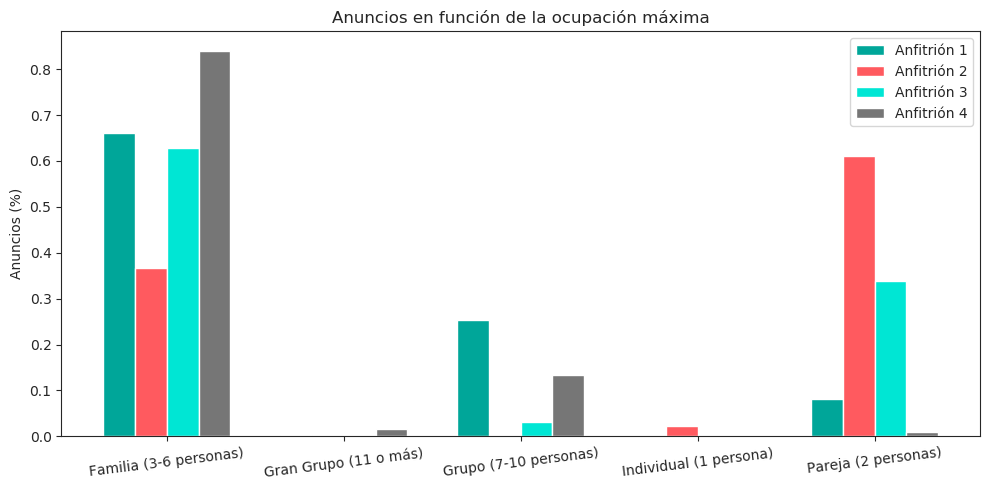

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = persona.index


x = np.arange(len(labels))  
width = 0.18  
color = ['#00A699', '#FF5A5F', "#00e6d4", "#767676"]
fig, ax = plt.subplots(figsize = (10,5))
rects1 = ax.bar(x - width*3/2, persona["Anfitrión 1"], width, label='Anfitrión 1', color = color[0])
rects2 = ax.bar(x -width/2, persona["Anfitrión 2"], width, label='Anfitrión 2', color = color[1])
rects3 = ax.bar(x + width/2, persona["Anfitrión 3"], width, label='Anfitrión 3', color = color[2])
rects4 = ax.bar(x + width*3/2, persona["Anfitrión 4"], width, label='Anfitrión 4', color = color[3])


ax.set_ylabel('Anuncios (%)')

ax.set_title('Anuncios en función de la ocupación máxima')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 1)
plt.xticks(rotation = 7)


fig.tight_layout();

plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/toppersonas.png")

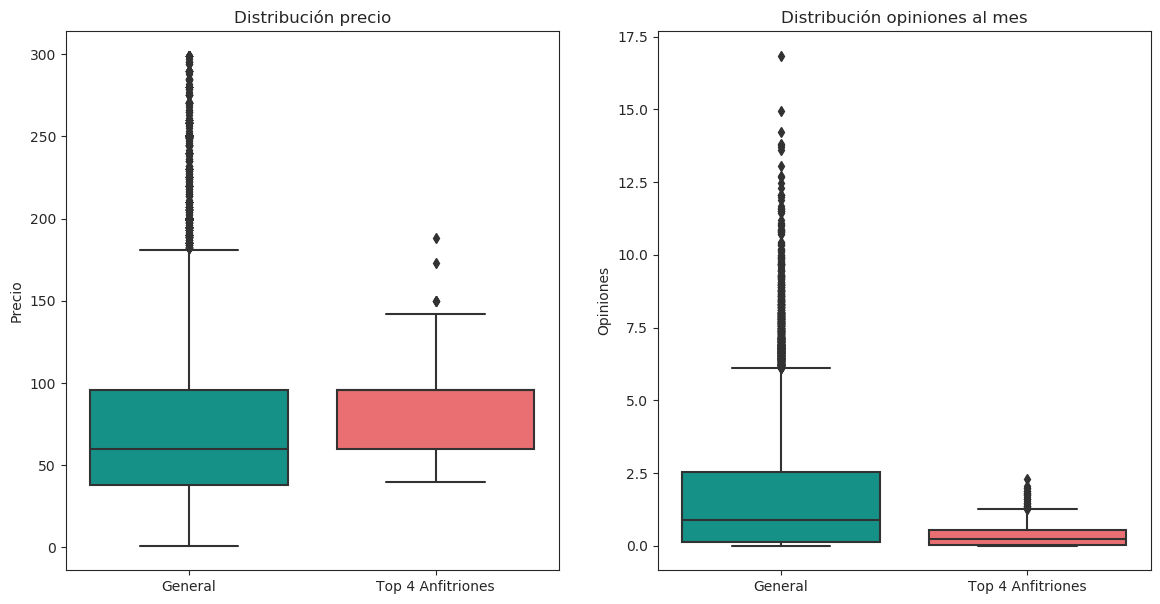

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,7))

data1 = (madrid_bnb2["price"].replace(np.nan,0), top_hosts["price"].replace(np.nan,0))
sns.boxplot(data=data1, palette = ['#00A699', '#FF5A5F'], ax = ax1)

ax1.set_xticklabels(("General", "Top 4 Anfitriones"))
ax1.set_title("Distribución precio")
ax1.set_ylabel("Precio")

data2 = (madrid_bnb2["reviews_per_month"].replace(np.nan,0), top_hosts["reviews_per_month"].replace(np.nan,0))
sns.boxplot(data=data2, palette = ['#00A699', '#FF5A5F'], ax = ax2)

ax2.set_xticklabels(("General", "Top 4 Anfitriones"))
ax2.set_title("Distribución opiniones al mes")
ax2.set_ylabel("Opiniones")



plt.show()

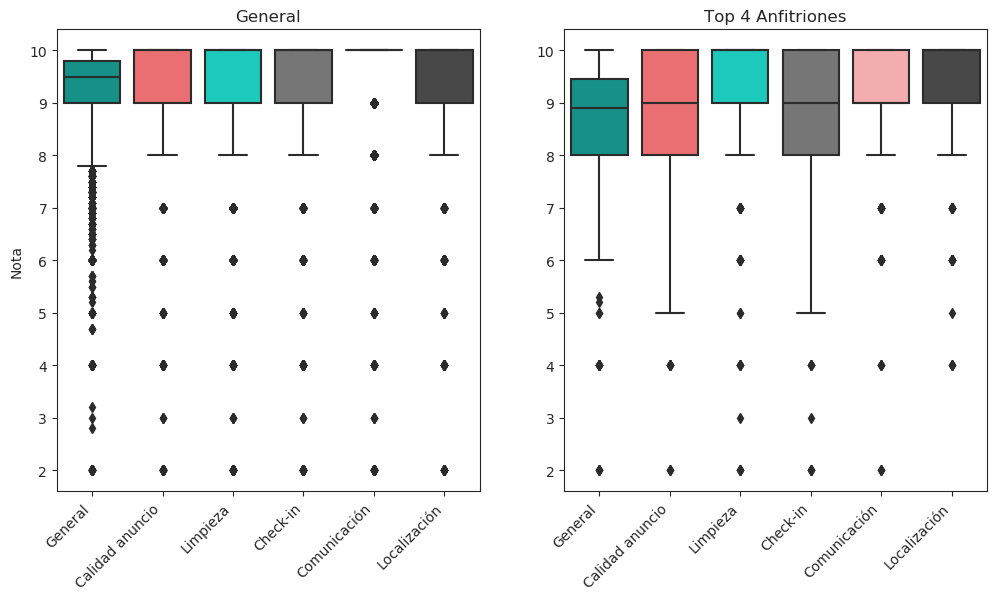

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))

general_score = madrid_bnb2[['review_scores_rating', 'review_scores_accuracy',
  'review_scores_cleanliness', 'review_scores_checkin',
  'review_scores_communication', 'review_scores_location']]
general_score["review_scores_rating"] = general_score["review_scores_rating"]/10 
sns.boxplot(data = general_score, ax = ax1, palette =  ['#00A699', '#FF5A5F', "#00e6d4", "#767676", "#ffa1a4", "#484848"])
ax1.set_xticklabels(labels = ["General", "Calidad anuncio", "Limpieza", "Check-in", "Comunicación", "Localización"], rotation = 45,ha="right")
ax1.set_title("General")
ax1.set_ylabel("Nota")
###
top_score = top_hosts[['review_scores_rating', 'review_scores_accuracy',
  'review_scores_cleanliness', 'review_scores_checkin',
  'review_scores_communication', 'review_scores_location']]
top_score["review_scores_rating"] = top_score["review_scores_rating"]/10 
sns.boxplot(data = top_score, ax = ax2, palette =  ['#00A699', '#FF5A5F', "#00e6d4", "#767676", "#ffa1a4", "#484848"])
ax2.set_xticklabels(labels = ["General", "Calidad anuncio", "Limpieza", "Check-in", "Comunicación", "Localización"], rotation = 45,ha="right")
ax2.set_title("Top 4 Anfitriones")
plt.show()

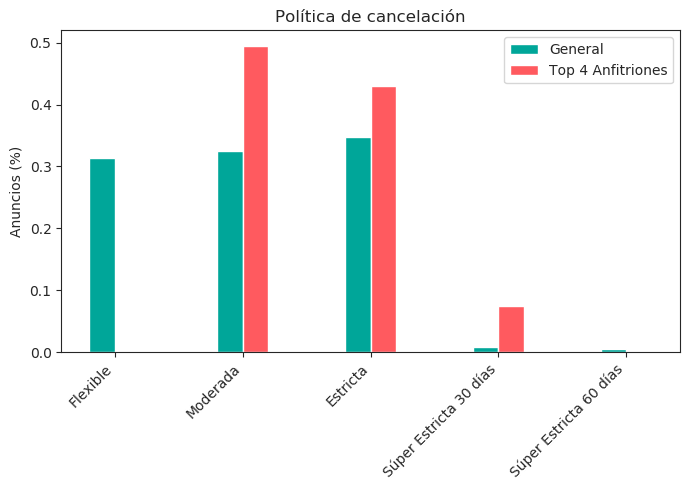

In [32]:
politica_cancel = pd.DataFrame(top_hosts["cancellation_policy"].value_counts()/top_hosts["cancellation_policy"].value_counts().sum()).merge(
    madrid_bnb2["cancellation_policy"].value_counts()/madrid_bnb2["cancellation_policy"].value_counts().sum(), how = "outer", left_index=True, right_index=True).replace(np.nan,0)

x = np.arange(len(politica_cancel))  # Colocación de la barra
width = 0.2 
color = ['#00A699', '#FF5A5F']
fig, ax = plt.subplots(figsize = (7,5))
rects1 = ax.bar(x - width/2, politica_cancel["cancellation_policy_y"], width, label='General', color = color[0])
rects2 = ax.bar(x + width/2, politica_cancel["cancellation_policy_x"], width, label='Top 4 Anfitriones', color = color[1])


# 
ax.set_ylabel('Anuncios (%)')

ax.set_title('Política de cancelación')
ax.set_xticks(x)
ax.set_xticklabels(labels = ["Flexible", "Moderada", "Estricta", "Súper Estricta 30 días", "Súper Estricta 60 días"], rotation = 45,ha="right")
ax.legend(loc = 1)


fig.tight_layout()
plt.show()

In [33]:
calendar = madrid_bnb2[["host_since", "longitude", "latitude"]].dropna()
calendar["host_since"] = pd.to_datetime(calendar["host_since"])
calendar.set_index("host_since", inplace = True)
calendar = calendar.groupby([pd.Grouper(freq = "Y"), "longitude", "latitude"]).count()
calendar.reset_index(inplace=True)

year = []
for i in calendar["host_since"]:
    year.append(i.year)
calendar["year"] = year
calendar.drop("host_since", axis = 1, inplace=True)

In [34]:
def year_scattermap(df, year, image_direction = "/home/ignareyesa/Descargas/map.png") :
    
    # Mapa
    ruh_m = plt.imread(image_direction)
    map_lim = ((df.longitude.min(),   df.longitude.max(),      df.latitude.min(), df.latitude.max()))
    
    df_year = df.loc[df["year"] <= year]
    
    # Plot
    fig, ax = plt.subplots(figsize = (8,7))
    ax.scatter(df_year.longitude, df_year.latitude, zorder=1, alpha= 0.5, c='k', s=3)
    ax.set_title('Alojamientos Año {}'.format(year))
    ax.set_xlim(map_lim[0],map_lim[1])
    ax.set_ylim(map_lim[2],map_lim[3])
    ax.set(xlabel = "Longitud", ylabel = "Latitud")
    ax.imshow(ruh_m, zorder=0, extent = map_lim, aspect= 'equal')

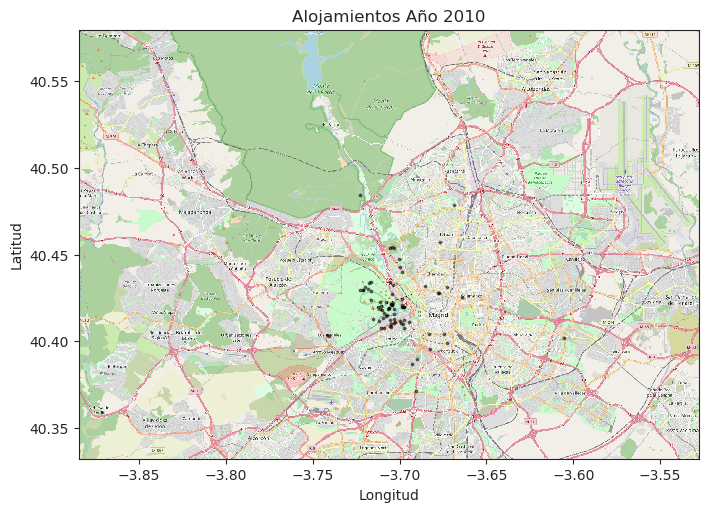

In [37]:
year_scattermap(calendar, 2010)

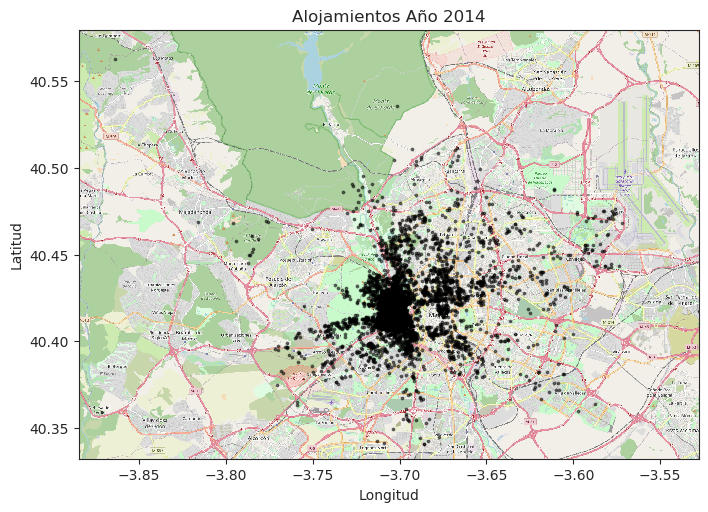

In [38]:
year_scattermap(calendar, 2014)

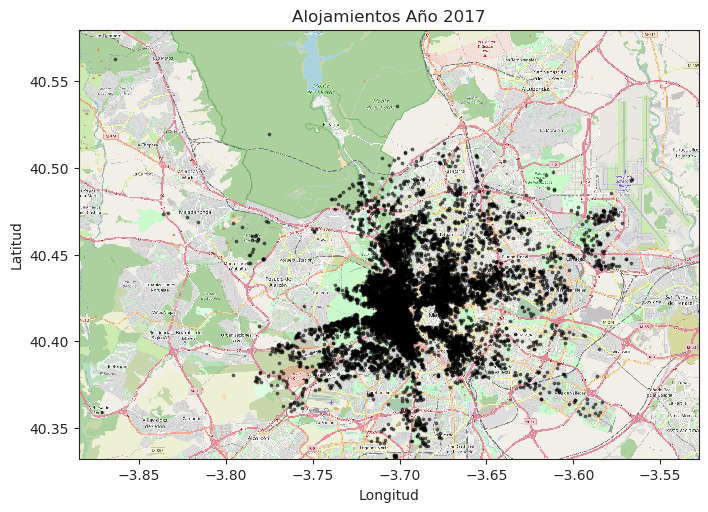

In [39]:
year_scattermap(calendar, 2017)

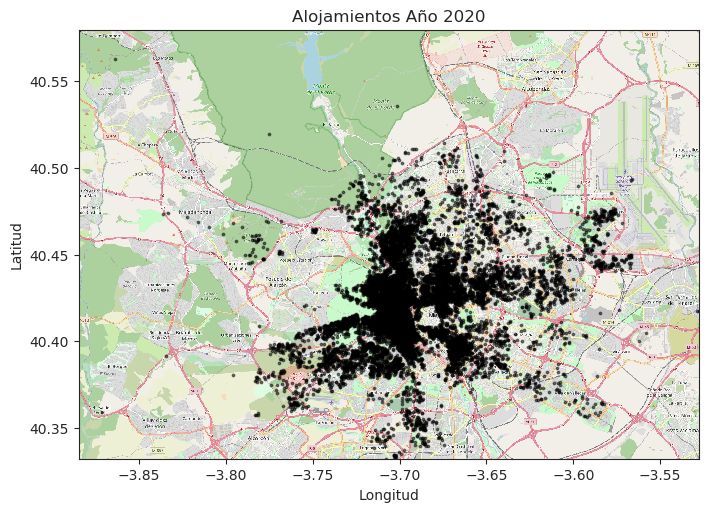

In [40]:
year_scattermap(calendar, 2020)